### Decsion Trees
A file to explore applicaitons of Decision Tree Classifiers for predicting the winner of a fight

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [119]:
path = os.getcwd()
p = path.removesuffix('ufcPredictionProject')
p= p+'UFCdata.csv'
p

'C:\\Users\\walkowae\\Documents\\GitHub\\UFCdata.csv'

In [120]:
df = pd.read_csv(p)
df.head(3)


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Aalon Cruz,Spike Carlyle,Scott Howard,2/29/2020,"Norfolk, Virginia, USA",Blue,False,Featherweight,NaN,NaN,...,0,0,0,0,Switch,182.88,198.12,145.0,26.0,30.0
1,Aaron Phillips,Matt Hobar,Kevin Nix,8/23/2014,"Tulsa, Oklahoma, USA",Blue,False,Bantamweight,0.0,0.0,...,0,0,0,0,Southpaw,175.26,180.34,135.0,27.0,25.0
2,Aaron Riley,Justin Salas,Randy Corley,7/27/2013,"Seattle, Washington, USA",Blue,False,Lightweight,0.0,1.0,...,3,0,0,0,Southpaw,172.72,175.26,155.0,31.0,32.0


In [121]:
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
print(cols_to_drop)
df = df.drop(cols_to_drop, axis=1)
df.head()

Index(['B_draw', 'R_draw'], dtype='object')


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Aalon Cruz,Spike Carlyle,Scott Howard,2/29/2020,"Norfolk, Virginia, USA",Blue,False,Featherweight,NaN,NaN,...,0,0,0,0,Switch,182.88,198.12,145.0,26.0,30.0
1,Aaron Phillips,Matt Hobar,Kevin Nix,8/23/2014,"Tulsa, Oklahoma, USA",Blue,False,Bantamweight,0.0,0.0,...,0,0,0,0,Southpaw,175.26,180.34,135.0,27.0,25.0
2,Aaron Riley,Justin Salas,Randy Corley,7/27/2013,"Seattle, Washington, USA",Blue,False,Lightweight,0.0,1.0,...,3,0,0,0,Southpaw,172.72,175.26,155.0,31.0,32.0
3,Aaron Riley,Joe Brammer,Steve Mazzagatti,5/29/2010,"Las Vegas, Nevada, USA",Red,False,Lightweight,0.0,0.0,...,2,0,0,0,Southpaw,172.72,175.26,155.0,26.0,29.0
4,Aaron Riley,Shane Nelson,Kevin Mulhall,8/8/2009,"Philadelphia, Pennsylvania, USA",Red,False,Lightweight,0.5,0.0,...,1,0,0,0,Southpaw,172.72,175.26,155.0,24.0,28.0


In [122]:
print(df.shape)
df = df.dropna()
df.shape

(6012, 142)


(3890, 142)

In [123]:
y = df.Winner
df = df.drop('Winner', axis = 1)
X_category = df.select_dtypes(exclude=np.number)
X_numerical = df.select_dtypes(include=np.number)

print(X_category.columns)
X_numerical.head(3)

Index(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'title_bout',
       'weight_class', 'B_Stance', 'R_Stance'],
      dtype='object')


,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
1,0.0,0.0,0.250,0.55,0.00,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,175.26,180.34,135.0,27.0,25.0
2,0.0,1.0,0.535,0.47,0.13,0.0,0.0,0.0,0.0,0.0,...,0,3,0,0,0,172.72,175.26,155.0,31.0,32.0
4,0.5,0.0,0.360,0.36,0.15,0.5,1.0,0.0,0.0,0.0,...,0,1,0,0,0,172.72,175.26,155.0,24.0,28.0


In [124]:


X_num = X_numerical


X_num = (X_num - X_num.mean())/X_num.std()
print(X_num.isnull().sum().sum())


0


In [125]:
X_cat = X_category.drop(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'title_bout'],axis=1)
X_cat=pd.get_dummies(X_cat)
print(X_cat.isnull().sum().sum())

0


In [126]:
X_cat.columns

Index(['weight_class_Bantamweight', 'weight_class_CatchWeight',
       'weight_class_Featherweight', 'weight_class_Flyweight',
       'weight_class_Heavyweight', 'weight_class_LightHeavyweight',
       'weight_class_Lightweight', 'weight_class_Middleweight',
       'weight_class_Welterweight', 'weight_class_WomenBantamweight',
       'weight_class_WomenFeatherweight', 'weight_class_WomenFlyweight',
       'weight_class_WomenStrawweight', 'B_Stance_Open Stance',
       'B_Stance_Orthodox', 'B_Stance_Southpaw', 'B_Stance_Switch',
       'R_Stance_Open Stance', 'R_Stance_Orthodox', 'R_Stance_Southpaw',
       'R_Stance_Switch'],
      dtype='object')

In [127]:
X = pd.concat([X_num,X_cat],axis=1)
print(y.value_counts())
print(X.shape)
X.head()

Red     2397
Blue    1424
Draw      69
Name: Winner, dtype: int64
(3890, 153)


,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,weight_class_WomenFlyweight,weight_class_WomenStrawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
1,-0.690263,-0.560499,-1.704518,1.003821,-1.119503,2.970785,-0.671011,1.041472,-0.470803,-0.444503,...,0,0,0,0,1,0,0,0,1,0
2,-0.690263,2.696667,0.666250,0.346643,-0.626459,-1.027669,-0.671011,-0.632948,-0.470803,-0.444503,...,0,0,0,0,1,0,0,0,1,0
4,0.616173,-0.560499,-0.789485,-0.556977,-0.550606,0.971558,0.761297,-0.632948,-0.470803,-0.444503,...,0,0,0,0,1,0,0,0,1,0
5,-0.690263,-0.560499,-0.469743,-0.549276,0.983048,0.221848,-0.626251,2.087984,1.434484,1.605974,...,0,0,0,1,0,0,0,0,1,0
7,-0.608611,-0.560499,0.511253,-0.125704,-0.170155,-0.321692,-0.581492,-0.626407,-0.470803,-0.444503,...,0,0,0,1,0,0,0,1,0,0



best tree depth = {'max_depth': 3}   valid error rate = 0.389


<AxesSubplot:xlabel='depth'>

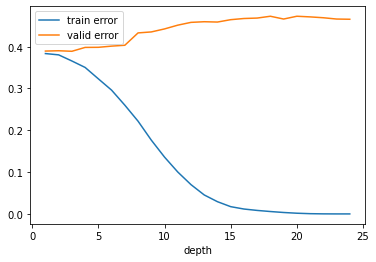

In [128]:
grid = {'max_depth':np.arange(1,25)}
rtree = DecisionTreeClassifier()
treeCV = GridSearchCV(rtree,param_grid=grid,return_train_score=True)

treeCV.fit(X,y)
print()
print('best tree depth =',treeCV.best_params_, '  valid error rate =', (1 - treeCV.best_score_).round(3))

results = pd.DataFrame()
results['depth'] = grid['max_depth']
results['train error'] =1 - treeCV.cv_results_['mean_train_score']
results['valid error']  = 1 - treeCV.cv_results_['mean_test_score']
ax1 = results.plot.line(x='depth',y='train error')
results.plot.line(x='depth',y='valid error',ax=ax1)

In [129]:
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X,y)


importances = tree.feature_importances_
tree_importances = pd.Series(importances, index=X.columns)
sorted = tree_importances.sort_values(ascending = True)
importantFeatures = sorted[sorted!=0]
print(importantFeatures.index.values)

['B_avg_opp_GROUND_landed' 'B_Height_cms' 'R_age' 'B_age'
 'B_avg_SIG_STR_att' 'R_avg_opp_HEAD_landed']


### Now decision Tree with only the important features polynomial?

In [130]:


X_important = X[importantFeatures.index.values]
X_important.head()

,B_avg_opp_GROUND_landed,B_Height_cms,R_age,B_age,B_avg_SIG_STR_att,R_avg_opp_HEAD_landed
1,0.254956,-0.130310,-1.258810,-0.702540,-1.062626,0.446185
2,0.007713,-0.719735,0.425417,0.292501,-0.424651,0.114389
4,-0.404359,-0.425023,-0.536998,-1.448821,-1.160776,0.030294
5,1.012138,-1.014448,-0.777602,0.292501,0.864793,0.739755
7,-0.683795,-0.719735,1.869041,0.541262,0.032973,-0.394007


             X shape = (3890, 6)
X (engineered) shape = (3890, 27)

best tree depth = {'max_depth': 3}   valid error rate = 0.388


<AxesSubplot:xlabel='depth'>

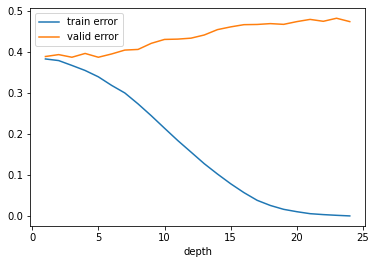

In [131]:
grid = {'max_depth':np.arange(1,25)}
rtree = DecisionTreeClassifier()
treeCV = GridSearchCV(rtree,param_grid=grid,return_train_score=True)

poly = PolynomialFeatures(2,interaction_only=False,include_bias=False)
Xe = poly.fit_transform(X_important)
cols = poly.get_feature_names(X_important.columns)
Xe = pd.DataFrame(Xe,columns=cols)
print('             X shape =',X_important.shape)
print('X (engineered) shape =',Xe.shape)



treeCV.fit(Xe,y)


print()
print('best tree depth =',treeCV.best_params_, '  valid error rate =', (1 - treeCV.best_score_).round(3))

results = pd.DataFrame()
results['depth'] = grid['max_depth']
results['train error'] =1 - treeCV.cv_results_['mean_train_score']
results['valid error']  = 1 - treeCV.cv_results_['mean_test_score']
ax1 = results.plot.line(x='depth',y='train error')
results.plot.line(x='depth',y='valid error',ax=ax1)

### LOL it got worse!!
lets give up on important features for now and check feature engineering on all variables

In [147]:
poly = PolynomialFeatures(2,interaction_only=False,include_bias=False)
Xf = poly.fit_transform(X)
cols = poly.get_feature_names(X.columns)
Xf = pd.DataFrame(Xf,columns=cols)
res = []
for c in Xf.columns:
    for check in X_important.columns:
        if(check in c):
            res.append(c)


            
print(len(res), ' compare to the original number of features after feature engineering', Xf.sh)
# print('             X shape =',X.shape)
# print('X (engineered) shape =',Xf.shape)


924


In [136]:
grid = {'max_depth':np.arange(1,25)}
rtree = DecisionTreeClassifier()
treeCV = GridSearchCV(rtree,param_grid=grid,return_train_score=True)


treeCV.fit(Xf,y)
print()
print('best tree depth =',treeCV.best_params_, '  valid error rate =', (1 - treeCV.best_score_).round(3))

results = pd.DataFrame()
results['depth'] = grid['max_depth']
results['train error'] =1 - treeCV.cv_results_['mean_train_score']
results['valid error']  = 1 - treeCV.cv_results_['mean_test_score']
ax1 = results.plot.line(x='depth',y='train error')
results.plot.line(x='depth',y='valid error',ax=ax1)

['B_avg_KD', 'B_avg_opp_KD', 'B_avg_SIG_STR_pct', 'B_avg_opp_SIG_STR_pct', 'B_avg_TD_pct', 'B_avg_opp_TD_pct', 'B_avg_SUB_ATT', 'B_avg_opp_SUB_ATT', 'B_avg_REV', 'B_avg_opp_REV', 'B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed', 'B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed', 'B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed', 'B_avg_opp_TOTAL_STR_att', 'B_avg_opp_TOTAL_STR_landed', 'B_avg_TD_att', 'B_avg_TD_landed', 'B_avg_opp_TD_att', 'B_avg_opp_TD_landed', 'B_avg_HEAD_att', 'B_avg_HEAD_landed', 'B_avg_opp_HEAD_att', 'B_avg_opp_HEAD_landed', 'B_avg_BODY_att', 'B_avg_BODY_landed', 'B_avg_opp_BODY_att', 'B_avg_opp_BODY_landed', 'B_avg_LEG_att', 'B_avg_LEG_landed', 'B_avg_opp_LEG_att', 'B_avg_opp_LEG_landed', 'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed', 'B_avg_opp_DISTANCE_att', 'B_avg_opp_DISTANCE_landed', 'B_avg_CLINCH_att', 'B_avg_CLINCH_landed', 'B_avg_opp_CLINCH_att', 'B_avg_opp_CLINCH_landed', 'B_avg_GROUND_att', 'B_avg_GROUND_landed', 'B_avg_opp_GROUND_att', 'B_avg_opp_GROUND_land

KeyboardInterrupt: 